### Load excel from google drive

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
import numpy as np
from tqdm import tqdm

LABEL_PATH ='/content/drive/MyDrive/bst227 project/AlleleB.xlsx'

xls = pd.ExcelFile(LABEL_PATH)
df = pd.read_excel(xls, 'VAST and brain measurements', header=0)
df.columns=['Fish ID', 'Experiment Number', 'Plate', 'ID', 'Genotype', 'Dechorionation']
df = df.iloc[1:, :]
df

,Fish ID,Experiment Number,Plate,ID,Genotype,Dechorionation
1,A01,1,1.1,1_1.1_A01,het,Natural
2,A03,1,1.1,1_1.1_A03,?,Natural
3,A06,1,1.1,1_1.1_A06,hom,Natural
4,A08,1,1.1,1_1.1_A08,?,Natural
5,A09,1,1.1,1_1.1_A09,?,Natural
...,...,...,...,...,...,...
371,E10,2,2.2,2_2.2_E10,wt,Natural
372,F02,2,2.2,2_2.2_F02,wt,Natural
373,F03,2,2.2,2_2.2_F03,wt,Natural
374,H06,2,2.2,2_2.2_H06,wt,Natural


In [28]:
print("Plates:",df["Plate"].unique())
print("Experiments:",df["Experiment Number"].unique())
print("Plates in Experimen 1:",df[df["Experiment Number"] == 1]["Plate"].unique())
print("Plates in Experimen 2:",df[df["Experiment Number"] == 2]["Plate"].unique())
#There are two plates and two experiments

print("Genotypes: ",df["Genotype"].unique())
# Four types of genotype in each experiment each plate

Plates: [1.1 1.2 2.1 2.2]
Experiments: [1 2]
Plates in Experimen 1: [1.1 1.2]
Plates in Experimen 2: [1.1 2.1 1.2 2.2]
Genotypes:  ['het' '?' 'hom' 'wt']


### Load images

In [29]:
import cv2
import os

def load_images_from_folder(f):

    images = {}
    for file_name in tqdm(os.listdir(f)):
        
        img = cv2.imread(os.path.join(f, file_name))
        if img is not None:
          images[file_name[-12:-5]] = img  # Store key name of images files
          
    return images

In [30]:
# Allele B
img_e1_p11 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.19_TH324a_AlleleB')
img_e1_p12 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.21_TH324a_AlleleB')
#two plates for experiment and four plates for experiment 2

img_e2_p11 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleB_Plate1')
img_e2_p12 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleB_Plate1_5dpf')
img_e2_p21 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleB_Plate2')
img_e2_p22 = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleB_Plate2_5dpf')

100%|██████████| 260/260 [00:03<00:00, 72.88it/s]


In [ ]:
# Allele C 4 plates per experiment
# I did not find any labels for this Allele
img_e1_p11_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.19_TH324b_AlleleC_Plate1')
img_e1_p12_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.21_TH324b_AlleleC_Plate1')
img_e1_p21_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.19_TH324b_AlleleC_Plate2')
img_e1_p22_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment1/2019.09.21_TH324b_AlleleC_Plate2')

img_e2_p11_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleC_Plate1')
img_e2_p12_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleC_Plate1_5dpf')
img_e2_p21_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.24_TH324b_AlleleC_Plate2')
img_e2_p22_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment2/2019.09.26_TH324b_AlleleC_Plate2_5dpf')

img_e3_p11_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.23_TH324b_AlleleC_Plate1')
img_e3_p12_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.25_TH324b_AlleleC_Plate1')
img_e3_p21_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.23_TH324b_AlleleC_Plate2')
img_e3_p22_c = load_images_from_folder('/content/drive/MyDrive/bst227 project/experiment3/2019.10.25_TH324b_AlleleC_Plate2')

### Create datasets and assign labels

In [31]:
# Confirm all images has been loaded
print(len(img_e1_p11) + len(img_e1_p12), df[df['Experiment Number']==1].shape[0]*4)
print(len(img_e2_p11) + len(img_e2_p12) + len(img_e2_p21) + len(img_e2_p22), df[df['Experiment Number']==2].shape[0]*4)

#For some reason we have 4 extra images for experiment one

228 224
1276 1276


In [32]:
def create_dataset(lables, imgs, exp, plate, assign=True):

  fish = {}
  category = {'wt': 0, 'het': 1, 'hom': 2, '?': 3}
  shape = next(iter(imgs.values())).shape
  m = int(len(imgs) / 4)
  X = np.zeros((m, 4, shape[0], shape[1], shape[2]))
  y = np.zeros((m, 1))

  i = 0
  for fn in imgs.keys(): #fn is the fish id and the plate
    fish_id = fn[0:3] # first three characters are the fish id
    if fish_id not in fish: 
      fish[fish_id] = i # add the fish id
      i += 1  #count number of images of the fish
 
    index = int(fn[-1]) - 1 
    id = '{}_{}_{}'.format(exp, plate, fish_id)
    
    X[fish[fish_id], index] = imgs[fn]

    if assign:
      try:
        y[fish[fish_id]] = category[df[df['ID']==id]['Genotype'].values[0]]
      except:
        y[fish[fish_id]] = 3
    else:
      #y = np.ones((m, 1))*3
      return X

  return X, y

In [33]:
'''
For Allele B data,
there is no label for fish 1_1.2_A11, but we still have images of this fish. 
Code:
  d = df.loc[df['Experiment Number'] == 1]
  id = list(d.loc[d['Plate'] == 1.2]['Fish ID'])
  'A11' in id
'''

X_e1_p11, y_e1_p11 = create_dataset(df, img_e1_p11, 1, '1.1')
X_e1_p12, y_e1_p12 = create_dataset(df, img_e1_p12, 1, '1.2')

X_e2_p11, y_e2_p11 = create_dataset(df, img_e2_p11, 2, '1.1')
X_e2_p12, y_e2_p12 = create_dataset(df, img_e2_p12, 2, '1.2')
X_e2_p21, y_e2_p21 = create_dataset(df, img_e2_p21, 2, '2.1')
X_e2_p22, y_e2_p22 = create_dataset(df, img_e2_p22, 2, '2.2')

print(y_e1_p11.shape[0] + y_e1_p12.shape[0] + y_e2_p11.shape[0] + y_e2_p12.shape[0] + y_e2_p21.shape[0] + y_e2_p22.shape[0])
print(df.shape[0]) # It misses one row entry of fish 1_1.2_A11

376
375


In [34]:
X_b = np.concatenate((X_e1_p11, X_e1_p12, X_e2_p11, X_e2_p12, X_e2_p21, X_e2_p22))
y_b = np.concatenate((y_e1_p11, y_e1_p12, y_e2_p11, y_e2_p12,y_e2_p21, y_e2_p22))
X_b = X_b[np.where(y_b != 3)[0]] # remove fished with unknown labels
y_b = y_b[np.where(y_b != 3)[0]]
print(f'X_b shape: {X_b.shape}')
print(f'y_b shape: {y_b.shape}')
np.save('X_b.npy', X_b)
np.save('y_b.npy', y_b)

del X_e1_p11,X_e1_p12,X_e2_p11,X_e2_p12,X_e2_p21,X_e2_p22

X_b shape: (285, 4, 200, 1024, 3)
y_b shape: (285, 1)


In [ ]:
# For Allele C data

X_e1_p11_c = create_dataset(df, img_e1_p11_c, 1, '1.1', assign=False)
X_e1_p12_c = create_dataset(df, img_e1_p12_c, 1, '1.2', assign=False)
X_e1_p21_c = create_dataset(df, img_e1_p21_c, 1, '2.1', assign=False)
X_e1_p22_c = create_dataset(df, img_e1_p22_c, 1, '2.2', assign=False)

X_e2_p11_c = create_dataset(df, img_e2_p11_c, 2, '1.1', assign=False)
X_e2_p12_c = create_dataset(df, img_e2_p12_c, 2, '1.2', assign=False)
X_e2_p21_c = create_dataset(df, img_e2_p21_c, 2, '2.1', assign=False)
X_e2_p22_c = create_dataset(df, img_e2_p22_c, 2, '2.2', assign=False)

X_e3_p11_c = create_dataset(df, img_e3_p11_c, 3, '1.1', assign=False)
X_e3_p12_c = create_dataset(df, img_e3_p12_c, 3, '1.2', assign=False)
X_e3_p21_c = create_dataset(df, img_e3_p21_c, 3, '2.1', assign=False)
X_e3_p22_c = create_dataset(df, img_e3_p22_c, 3, '2.2', assign=False)

In [ ]:
X_c = np.concatenate((X_e1_p11_c, X_e1_p12_c, X_e1_p21_c, X_e1_p22_c,
                      X_e2_p11_c, X_e2_p12_c, X_e2_p21_c, X_e2_p22_c,
                      X_e3_p11_c, X_e3_p12_c, X_e3_p21_c, X_e3_p22_c,
                      ))
np.save('X_c.npy', X_c)

### Plot examples

In [15]:
# Plot examples
import matplotlib.pyplot as plt
def plot_fish(X, y, index):
  plt.figure(figsize=(432, 288))
  f, axarr = plt.subplots(4) 

  axarr[0].imshow(X[index, 0]/255)
  axarr[1].imshow(X[index, 1]/255)
  axarr[2].imshow(X[index, 2]/255)
  axarr[3].imshow(X[index, 3]/255)
  plt.title(y[index])
  plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


<Figure size 31104x20736 with 0 Axes>

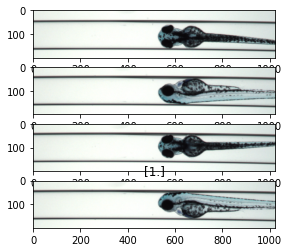

<Figure size 31104x20736 with 0 Axes>

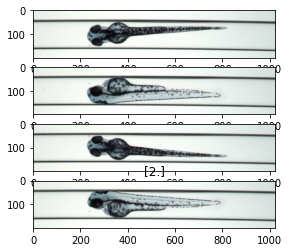

<Figure size 31104x20736 with 0 Axes>

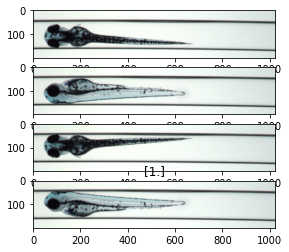

<Figure size 31104x20736 with 0 Axes>

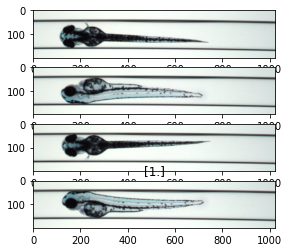

In [17]:
import matplotlib.pyplot as plt

plot_fish(X_b, y_b, 0)
plot_fish(X_b, y_b, 1)
plot_fish(X_b, y_b, 2)
plot_fish(X_b, y_b, 3)